In [5]:
import pandas as pd
import numpy as np
from random import randrange
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns; sns.set()
from scipy import stats
import math
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
students = pd.read_csv("student.csv")
students.head(365)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel.y,freetime.y,goout.y,Dalc.y,Walc.y,health.y,absences.y,G1.y,G2.y,G3.y
0,GP,F,15,R,GT3,T,1,1,at_home,other,...,3,1,2,1,1,1,4,13,13,13
1,GP,F,15,R,GT3,T,1,1,other,other,...,3,3,4,2,4,5,2,13,11,11
2,GP,F,15,R,GT3,T,2,2,at_home,other,...,4,3,1,1,1,2,8,14,13,12
3,GP,F,15,R,GT3,T,2,4,services,health,...,4,3,2,1,1,5,2,10,11,10
4,GP,F,15,R,GT3,T,3,3,services,services,...,4,2,1,2,3,3,2,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,MS,F,18,U,GT3,T,3,3,services,services,...,5,3,4,1,1,5,0,10,10,10
361,MS,F,18,U,GT3,T,3,3,services,services,...,4,3,2,1,3,3,6,13,12,13
362,MS,F,18,U,LE3,T,1,1,at_home,services,...,5,3,2,1,1,4,0,19,17,18
363,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16


In [3]:
studentnumber = "r0839461"

def stdnr_splitter(studentnumber):
    # decompose student number into interesting 
    cons_array = np.array(list(studentnumber))[2:].astype(int)
    indices = np.unique(cons_array)
    sum = round(np.sum(cons_array)/6)+1
    random = randrange(7)+1
    # interaction terms
    var1_index = int(round((sum*random)/7)+1)
    # quadratic terms
    var2a_index = int(round((sum/random)))
    var2b_index = int(round((randrange(10)+1)%var2a_index))
    print(f"Your groups are: {var1_index} and {var2a_index}")

stdnr_splitter(studentnumber)

Your groups are: 3 and 3


In [56]:
# Hier maak ik mijn eigen database aan genaamd dataset en ik steek hier de basic informatie, 
# mijn nummer informatie en de grade scores in

# BEKIJK VOOR ALLE 18 JARIGE 
datasetje = students[students['age']==18]
dataset = {'school':datasetje["school"], 'sex':datasetje["sex"], 'age':datasetje["age"], 'address':datasetje["address"], 'famsize':datasetje["famsize"], 'freetime':datasetje["freetime.x"], 'guardian':datasetje["guardian.x"], 'traveltime':datasetje["traveltime.x"], 'studytime':datasetje["studytime.x"], 'failures':datasetje["failures.x"], 'G1_math':datasetje["G1.x"], 'G2_math':datasetje["G2.x"], 'G3_math':datasetje["G3.x"], 'G1_portu':datasetje["G1.y"], 'G2_portu':datasetje["G2.y"], 'G3_portu':datasetje["G3.y"]}
data = pd.DataFrame(dataset)
data.head()

,school,sex,age,address,famsize,freetime,guardian,traveltime,studytime,failures,G1_math,G2_math,G3_math,G1_portu,G2_portu,G3_portu
143,GP,F,18,R,GT3,1,mother,2,2,0,10,9,9,12,9,10
144,GP,F,18,R,GT3,2,mother,3,1,3,9,8,10,11,10,11
145,GP,F,18,R,GT3,3,mother,2,2,0,6,0,0,8,9,10
146,GP,F,18,R,GT3,4,mother,2,4,0,10,9,0,14,13,14
147,GP,F,18,R,GT3,3,mother,1,2,1,9,8,7,8,8,8


In [57]:
# Al de punten zijn afhankelijk van de studytime en freetime die de leerlingen hebben.
afhankelijk = {"G1_math": dataset["G1_math"], "G2_math": dataset["G2_math"], "G3_math": dataset["G3_math"], "G1_portu": dataset["G1_portu"], "G2_portu": dataset["G2_portu"], "G3_portu": dataset["G3_portu"]}
afhankelijkedata = pd.DataFrame(afhankelijk)
afhankelijkedata.head()

,G1_math,G2_math,G3_math,G1_portu,G2_portu,G3_portu
143,10,9,9,12,9,10
144,9,8,10,11,10,11
145,6,0,0,8,9,10
146,10,9,0,14,13,14
147,9,8,7,8,8,8


In [58]:
# School, sex, age, address,famsize, guardian en failures 
onafhankelijk = {"school": dataset["school"], "sex": dataset["sex"], "age": dataset["age"], "address": dataset["address"], "famsize": dataset["famsize"], "freetime": dataset["freetime"], "guardian": dataset["guardian"], "traveltime": dataset["traveltime"], "studytime": dataset["studytime"], "failures": dataset["failures"]}
onafhankelijkedata = pd.DataFrame(onafhankelijk)
onafhankelijkedata.head()

,school,sex,age,address,famsize,freetime,guardian,traveltime,studytime,failures
143,GP,F,18,R,GT3,1,mother,2,2,0
144,GP,F,18,R,GT3,2,mother,3,1,3
145,GP,F,18,R,GT3,3,mother,2,2,0
146,GP,F,18,R,GT3,4,mother,2,4,0
147,GP,F,18,R,GT3,3,mother,1,2,1


In [59]:
# DEZE DATABASE BEVAT DE INFO DIE GEBRUIKT WORD.
linear = {"studytime": onafhankelijkedata["studytime"], "G3": afhankelijkedata["G3_math"]}
lineardata = pd.DataFrame(linear)
lineardata.head()

,studytime,G3
143,2,9
144,1,10
145,2,0
146,4,0
147,2,7


In [60]:
# Hier zet ik de data die ik ga gebruiken in een test en train data om hiermee te werken.
x_train, x_test, y_train, y_test = train_test_split(lineardata["studytime"], lineardata["G3"], test_size=0.25, random_state=0)
x_train= x_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

## Linear regression

In [61]:
regressor = LinearRegression()

In [62]:
regressor.fit(x_train, y_train)

LinearRegression()

In [19]:
regressor.predict(x_train)

array([[ 9.17263844],
       [ 7.96742671],
       [10.37785016],
       [ 9.17263844],
       [10.37785016],
       [ 9.17263844],
       [ 7.96742671],
       [ 9.17263844],
       [ 9.17263844],
       [ 9.17263844],
       [11.58306189],
       [ 9.17263844],
       [ 9.17263844],
       [ 7.96742671],
       [ 7.96742671],
       [10.37785016],
       [ 9.17263844],
       [ 9.17263844],
       [ 9.17263844],
       [10.37785016],
       [10.37785016],
       [ 7.96742671],
       [ 7.96742671],
       [ 7.96742671],
       [ 9.17263844],
       [ 9.17263844],
       [10.37785016],
       [11.58306189],
       [11.58306189],
       [10.37785016],
       [ 7.96742671],
       [ 9.17263844],
       [ 9.17263844],
       [10.37785016],
       [10.37785016],
       [ 9.17263844],
       [ 7.96742671],
       [11.58306189],
       [ 9.17263844],
       [ 9.17263844],
       [10.37785016],
       [ 9.17263844],
       [ 9.17263844],
       [ 7.96742671],
       [ 9.17263844],
       [ 9

In [63]:
# Hier zien we de score van de linear regression
# deze is zeer laag en dus zeer slecht omdat de data niet altijd gelijk is van personen met dezelfde studytime
regressor.score(x_test, y_test)

0.01424428291323876

In [64]:
# daarom zijn er hier ook veel errors!
mean_squared_error(x_test, y_test)

85.23809523809524

## polynomial regression

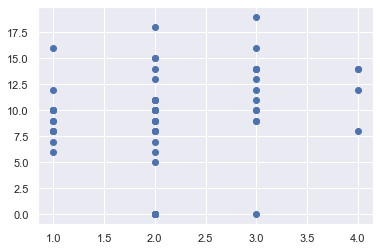

In [65]:
# in deze scatterplot kunnen we zien dat er zowel mensen hoge punten scoren bij 1 studytime vergeleken met die van 4
# We kunnen wel meteen zien dat er minder mensen aan 4 studytime zijn geraakt dan mensen in 1,2 en 3
plt.scatter(x_train, y_train)
plt.show()

In [66]:
# ik gebruik hier degree 5 of hoger omdat dit de meest accurate degree is van de data
# dit wil zeggen dat de relatie tussen de data op x^5 is of hoger voor accuratere data.
pol_0 = PolynomialFeatures(degree=5)
model = LinearRegression()
model.fit(pol_0.fit_transform(x_train), y_train)
print(model.score(pol_0.fit_transform(x_train), y_train))

0.12109181141439207


## Logistic regression

In [76]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)
predictions = model2.predict(x_test)
print(predictions)

[10 10 14 14 10 10 10 10 10 14 10 10 10 10 10 10 14 10 10 14 14]


C:\Users\robby\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [77]:
score = model2.score(x_test, y_test)
print(score)

0.09523809523809523


In [68]:
# voor de decision tree en kNN spreken we van een groepering waar al de mensen boven 9 geslaagd zijn 
geslaagd = linear["G3"] > 9
linear["studytime"] = linear["studytime"].values.reshape(-1, 1)

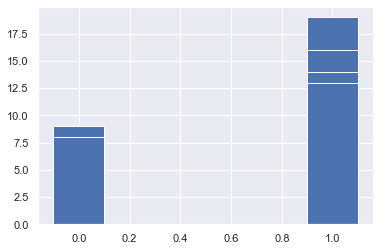

In [87]:
plt.bar(geslaagd, linear["G3"], width=0.2)
plt.show()

## Decision tree

In [79]:
Decision = DecisionTreeClassifier()
decision_fit = Decision.fit(linear["studytime"], geslaagd)
predictions = Decision.predict(x_test)
print(predictions)

[False False  True  True False False False False False  True False False
 False False False False  True False False  True  True]


In [89]:
decision_fit.score(linear["studytime"], geslaagd)

0.5802469135802469

## K nearest neighbours

In [86]:
# Hier kijken we naar de dichte buren per studytime en zien we dat we iets minder accuraat zijn als logistic en decision trees
# maar hier spreken we wel beter dan linear of polynomial.
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(linear["studytime"], geslaagd)

neigh.predict(x_test[0].reshape(1,-1))
neigh.predict(x_test[0:10])
predictions = neigh.predict(x_test)
print(predictions)

neigh.score(linear["studytime"], geslaagd)

[False False  True  True False False False False False  True False False
 False False False False  True False False  True  True]


0.5802469135802469

## K-mean

In [88]:
# hier spreken we niet van classificatie maar van clustering en gaan we meer vergelijken op gelijke kenmerken
# dit is veel slechter dan in groepering bij decision trees , logistic regression en k Nearest Neighbours
from sklearn.metrics import accuracy_score
accuracy_score(linear["studytime"], geslaagd)

0.09876543209876543

## CONCLUSION

bij mijn berekeningen heb ik ondervonden dat linear en k-mean de slechste benadering zijn voor mijn onderzoek.
Polynomial regression doet het iets beter nu dat we specifiek op leeftijd gaan met een kleine 12%.
de Knn en decision tree komen dan wat accurater uit met 58% maar is nog steeds niet top.
De logistic regression is hier hetzelfde als de k-mean, maar het valt wel op dat de tijd van studeren niet veel uitmaakte bij deze studenten, bij het nakijken van de data zelfstandig merkte ik zel al op dat mensen die 5 gaven bij studytime soms minder punten hadden dan bij mensen die maar 1 bij studytime hebben gezet. 

Ook verschilt het heel veel sommige mensen met 5 studytime hebben hoge punten sommige laag dus het inschatten hier is zeer moeilijk zonder zelfstandig naar de data te gaan kijken. 

Daarom denk ik dat het beste is om groeperingen te maken van geslaagd of niet geslaagd en zo verder te gaan onderzoeken en niet per persoon te gaan kijken bij de linear regression en polynomial regressie.

Ook voor dit examen heb ik nu per leeftijd gepakt zodat er veel minder leeftijdsverschil zit tussen de studenten en zo is de data ook iets accurater omdat we met minder verspreidde data werken.